In [589]:
import numpy as np
import pandas as pd

In [590]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [591]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [592]:
PassengerId = test['PassengerId']

In [593]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [594]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [595]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [596]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [597]:
Xtrain = train.drop(["Cabin", "Ticket", "PassengerId" ,"Survived"], axis=1)
Xtest = test.drop(["Cabin", "Ticket",  "PassengerId"], axis=1)
#Xtrain['Survived'] = False
Xtrain['is_test'] = False
Xtest['is_test'] = True
X = pd.concat([Xtrain, Xtest], axis=0)
#X.index = range(len(X))
X.columns = X.columns.str.lower()

In [598]:
X.head()

,pclass,name,sex,age,sibsp,parch,fare,embarked,is_test
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,False
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,False
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,False
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,False


In [599]:
train.Survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [600]:
Xtrain.shape

(891, 9)

In [601]:
from sklearn.preprocessing import LabelEncoder

In [602]:
# df=pd.DataFrame()
# for col, num in train.Survived:
#     df[col] = train[~train.Survived].Survived.str.contains(col).astype(int)
#train11=(train.Survived=='0').astype(str('D'))
#train['Survived']=(train.Survived=='1').astype(str('A'))

In [603]:
# df.values

In [604]:
le = LabelEncoder()
y = le.fit_transform(train.Survived)

In [605]:
list(le.classes_)

[0, 1]

In [606]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
pclass      1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1308 non-null float64
embarked    1307 non-null object
is_test     1309 non-null bool
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 93.3+ KB


In [607]:
X.age.fillna(X.age.median(), inplace=True)

In [608]:
X.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [609]:
X.fare.fillna(X.fare.median(), inplace=True)

In [610]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
pclass      1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float64
embarked    1307 non-null object
is_test     1309 non-null bool
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 93.3+ KB


In [611]:
X['sex'] = (X.sex=='male').astype(int)

In [612]:
X.head()

,pclass,name,sex,age,sibsp,parch,fare,embarked,is_test
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,False
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,False
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,False
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,False


In [613]:
#train.columns == test.columns

In [614]:
X = pd.get_dummies(X, columns=['embarked'])

In [615]:
X.head()

,pclass,name,sex,age,sibsp,parch,fare,is_test,embarked_C,embarked_Q,embarked_S
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,False,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,False,1,0,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,False,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,False,0,0,1
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,False,0,0,1


In [616]:
from collections import Counter

In [617]:
one_big_text = " ".join(X.name)
words = one_big_text.replace('/',' / ').split()
most_common = Counter(words).most_common()
most_common[:20]

[('Mr.', 757),
 ('Miss.', 260),
 ('Mrs.', 197),
 ('William', 85),
 ('John', 72),
 ('Master.', 61),
 ('Henry', 47),
 ('Charles', 39),
 ('James', 37),
 ('George', 35),
 ('Joseph', 31),
 ('Thomas', 31),
 ('Edward', 28),
 ('Johan', 22),
 ('Frederick', 20),
 ('Samuel', 20),
 ('Arthur', 20),
 ('Alfred', 18),
 ('Alexander', 17),
 ('Robert', 17)]

In [618]:
Xname = pd.DataFrame()
for col, num in most_common[:10]:
    Xname[col] = X[~X.is_test].name.str.contains(col).astype(int)

In [619]:
from sklearn.tree import DecisionTreeClassifier

In [620]:
clf = DecisionTreeClassifier(max_depth=4)

In [621]:
clf.fit(Xname, train.Survived)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [622]:
clf.feature_importances_

array([0.57448351, 0.0301036 , 0.36130192, 0.00419181, 0.00975227,
       0.00868202, 0.01051223, 0.        , 0.00097265, 0.        ])

In [623]:
Xname.columns

Index(['Mr.', 'Miss.', 'Mrs.', 'William', 'John', 'Master.', 'Henry',
       'Charles', 'James', 'George'],
      dtype='object')

In [624]:
X['is_Mrs'] = X.name.str.contains('Mrs. ').astype(int)
X['is_Mr'] = X.name.str.contains('Mr. ').astype(int)
X['is_Miss'] = X.name.str.contains('Miss.').astype(int)


In [625]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
pclass        1309 non-null int64
name          1309 non-null object
sex           1309 non-null int32
age           1309 non-null float64
sibsp         1309 non-null int64
parch         1309 non-null int64
fare          1309 non-null float64
is_test       1309 non-null bool
embarked_C    1309 non-null uint8
embarked_Q    1309 non-null uint8
embarked_S    1309 non-null uint8
is_Mrs        1309 non-null int32
is_Mr         1309 non-null int32
is_Miss       1309 non-null int32
dtypes: bool(1), float64(2), int32(4), int64(3), object(1), uint8(3)
memory usage: 97.2+ KB


In [626]:
Xtrain_prep = X[X.is_test==False].drop(['is_test', 'name'], axis=1)
Xtest_prep = X[X.is_test==True].drop(['is_test', 'name'], axis=1)

In [654]:
Xtest_prep.head()

,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,is_Mrs,is_Mr,is_Miss
0,3,1,34.5,0,0,7.8292,0,1,0,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1,1,0,0
2,2,1,62.0,0,0,9.6875,0,1,0,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1,0,1,0
4,3,0,22.0,1,1,12.2875,0,0,1,1,0,0


In [628]:
from sklearn.model_selection import GridSearchCV

In [629]:
depths = np.arange(1,10)
#features_num = np.arange(5,15)
grid = {'max_depth': depths}
#, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

In [630]:
%%time
gridsearch.fit(Xtrain_prep, y)

Wall time: 284 ms


C:\Users\663806\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [631]:
results = pd.DataFrame(gridsearch.cv_results_)
results[['mean_test_score','std_test_score','params']].sort_values(by='mean_test_score', ascending=False)

,mean_test_score,std_test_score,params
1,-0.469406,0.026632,{'max_depth': 2}
2,-0.473726,0.110115,{'max_depth': 3}
0,-0.518598,0.024343,{'max_depth': 1}
3,-0.822198,0.209150,{'max_depth': 4}
4,-1.252505,0.379758,{'max_depth': 5}
5,-1.436316,0.620243,{'max_depth': 6}
6,-2.244433,0.856730,{'max_depth': 7}
7,-2.935006,0.682534,{'max_depth': 8}
8,-3.805414,1.005493,{'max_depth': 9}


In [641]:
clf_final = DecisionTreeClassifier(max_depth=3)

In [642]:
clf_final.fit(Xtrain_prep, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [643]:
y_pred_proba = clf_final.predict_proba(Xtest_prep)
y_pred = clf_final.predict(Xtest_prep)

In [644]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)

In [645]:
#from subprocess import check_call

In [646]:
from sklearn.tree import export_graphviz
with open("tree1.dot", 'w') as f:
     f = export_graphviz(clf_final,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(Xtrain_prep),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )
        

In [658]:
def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [660]:
#get_tree_dot_view(clf_final, list(Xtrain_prep.columns), ['Died', 'Survived'])

In [653]:
acc_decision_tree = round(clf_final.score(Xtrain_prep, y) * 100, 2)
acc_decision_tree

82.72

In [2]:
from subprocess import check_call
#check_call(['dot','-Tpng','C:\\Users\\663806\\materyali__k_zanytiyu_i_dz\\1. Desicion trees\\tree1.dot','-o','C:\\Users\\663806\\materyali__k_zanytiyu_i_dz\\1. Desicion trees\\tree1.png'])

In [6]:
import pydot

(graph,) = pydot.graph_from_dot_file('tree1.dot')
graph.write_png('tree1.png')

In [8]:
from PIL import Image, ImageDraw, ImageFont

In [13]:
img = Image.open("tree1.png")

In [14]:
from IPython.display import Image as PImage

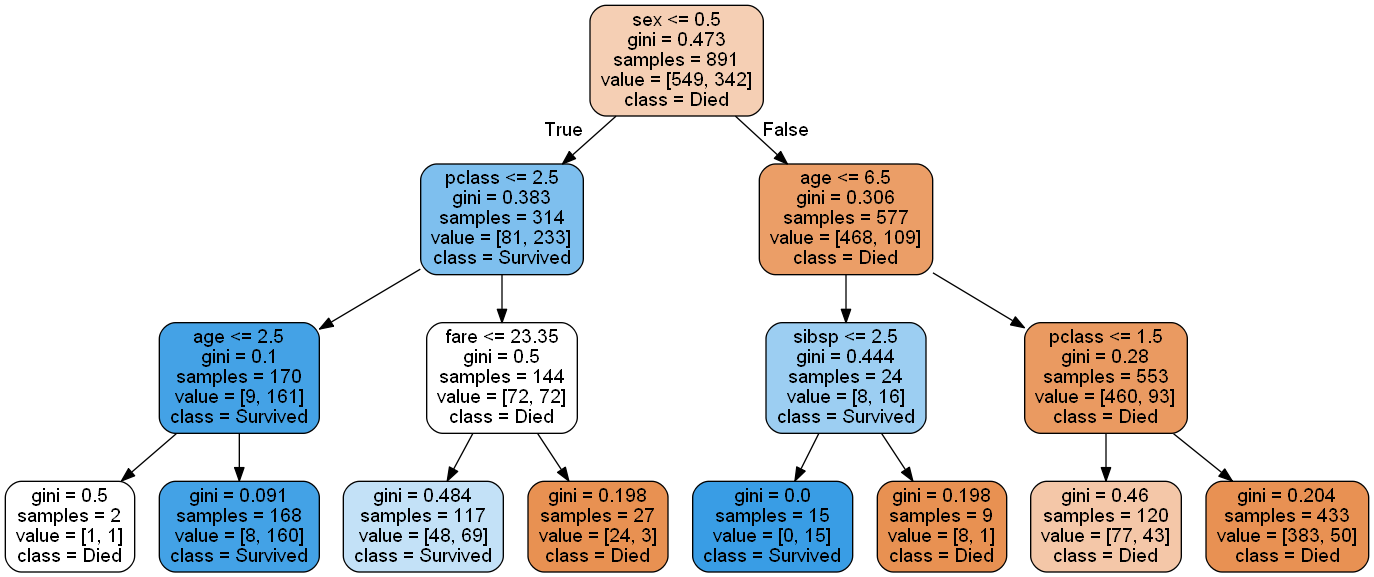

In [15]:
img.save('sample-out.png')
PImage("sample-out.png")